In [28]:
!pip install tensorflow keras scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [16]:
# Redimensionnement des images
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# Normalisation des pixels
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
from keras.models import Sequential
from keras.layers import Dense

# Définition du modèle
model = Sequential()
#model.add(Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.add(Dense(10, activation='softmax'))

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Compilation du modèle
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1122 - val_loss: 2.3005 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3006 - accuracy: 0.1124 - val_loss: 2.3002 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3003 - accuracy: 0.1124 - val_loss: 2.2998 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2999 - accuracy: 0.1124 - val_loss: 2.2995 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2996 - accuracy: 0.1124 - val_loss: 2.2991 - val_accuracy: 0.1135


313/313 [==============================] - 1s 2ms/step - loss: 2.2991 - accuracy: 0.1135
Test accuracy: 0.11349999904632568
313/313 [==============================] - 0s 1ms/step


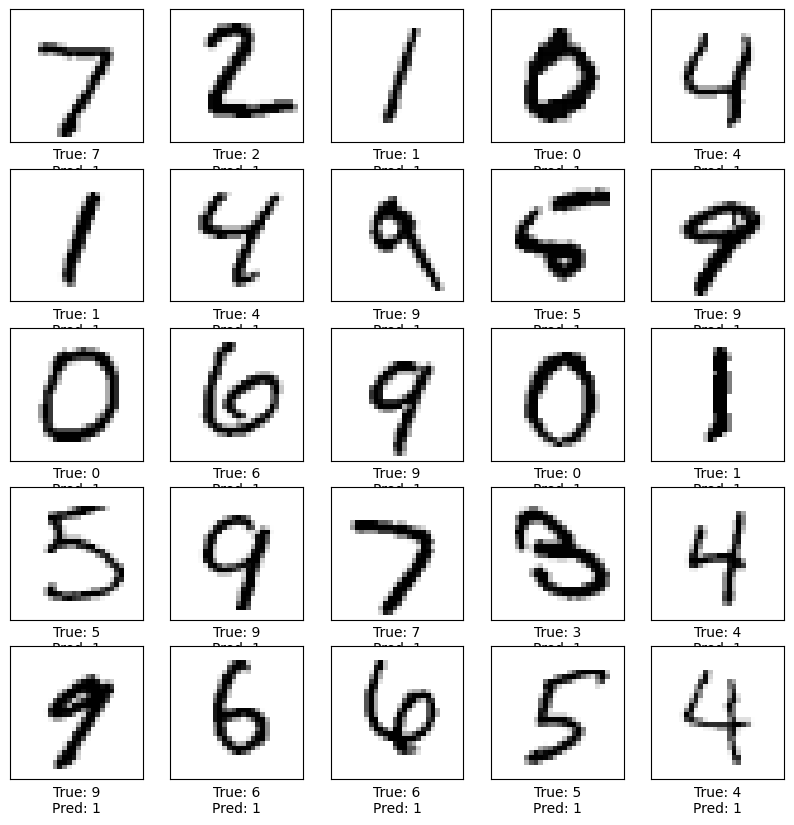

In [23]:
# Evaluate the model on the testing data
import matplotlib.pyplot as plt
import numpy as np

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Get the model predictions for the testing data
y_pred = model.predict(x_test)

# Plot the first 25 images in the testing data with their predicted labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(x_test[i].reshape(28, 28), cmap='binary')
    
    # Show true and predicted labels
    true_label = np.argmax(y_test[i])
    pred_label = np.argmax(y_pred[i])
    ax.set_xlabel(f"True: {true_label}\nPred: {pred_label}")
    
    # Remove ticks from plot
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the test data
_, (x_test, y_test) = mnist.load_data()

# Preprocess the data
X_test = x_test.reshape(-1, 28*28) / 255.0

# Make predictions
y_pred = model.predict(x_test)

# Convert probabilities to labels
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap='gray')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()


ValueError: in user code:

    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/porus/Documents/Projects/deep_learning_esiee/env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_8' (type Sequential).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28, 28)
    
    Call arguments received by layer 'sequential_8' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None
